#8 Core Emotion detection of text using Text Classification and Sentiment Analysis

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
!pip install neattext

     |████████████████████████████████| 114 kB 27.2 MB/s 


In [6]:
import neattext.functions as nfx

In [7]:
df= pd.read_csv(r'/content/emotion_dataset.csv')

In [8]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [9]:
df.shape

(34792, 4)

In [10]:
df.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [11]:
df = df[['Emotion', 'Text']]

In [12]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [13]:
df.shape

(34792, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [15]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

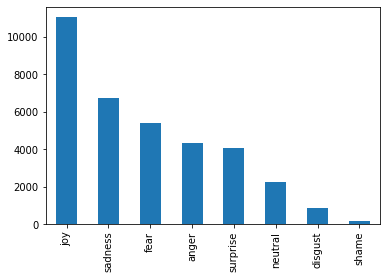

<Figure size 720x360 with 0 Axes>

In [16]:
df['Emotion'].value_counts().plot(kind= 'bar')
plt.figure(figsize=(10,5))
plt.show()

In [17]:
from textblob import TextBlob

In [18]:
def get_sentiment(text):
  blob= TextBlob(text)
  sentiment= blob.sentiment.polarity
  if sentiment > 0:
    result= 'Positive'
  elif sentiment < 0:
    result= 'Negative'
  else:
    result= 'Neutral'
  return result


In [19]:
get_sentiment('I like going to my College')

'Neutral'

In [20]:
get_sentiment('I do not like travelling in metro for a long time')

'Negative'

In [21]:
get_sentiment('I had a great workout today')

'Positive'

In [22]:
get_sentiment('You have very bad breath')

'Negative'

In [23]:
df['Sentiment']= df['Text'].apply(get_sentiment)

In [24]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [25]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

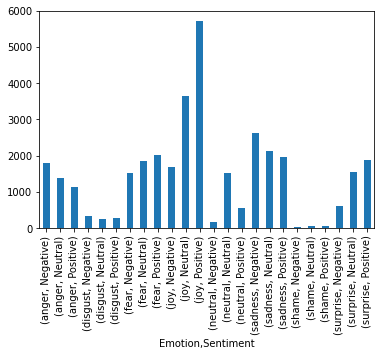

In [26]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [27]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [28]:
df['Clean_Text']= df['Text'].apply(nfx.remove_stopwords)

In [29]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_userhandles)

In [30]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_punctuations)

In [31]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [32]:
from collections import Counter

In [33]:
def extract_keywords(text, num=50):
  tokens= [tok for tok in text.split()]
  most_common_tokens= Counter(tokens).most_common(num)
  return dict(most_common_tokens)


In [34]:
emotion_list= df['Emotion'].unique().tolist()

In [35]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [36]:
joy_list= df[df['Emotion']== 'joy']['Clean_Text'].tolist()

In [37]:
joy_docx= ' '.join(joy_list)

In [38]:
keyword_joy= extract_keywords(joy_docx)

In [39]:
keyword_joy

{'2': 262,
 ':)': 311,
 'Christmas': 453,
 'God': 177,
 'Im': 555,
 'RT': 159,
 'amp': 678,
 'cant': 165,
 'class': 141,
 'day': 729,
 'days': 208,
 'excited': 145,
 'family': 181,
 'feel': 227,
 'feeling': 159,
 'felt': 167,
 'friend': 169,
 'friends': 155,
 'going': 304,
 'good': 345,
 'got': 328,
 'great': 194,
 'happy': 368,
 'home': 302,
 'hour': 172,
 'hours': 251,
 'it': 162,
 'joy': 257,
 'know': 177,
 'life': 251,
 'like': 476,
 'long': 204,
 'love': 393,
 'me': 196,
 'morning': 288,
 'new': 181,
 'night': 332,
 'people': 201,
 'right': 142,
 's': 180,
 'school': 297,
 'sleep': 185,
 'think': 148,
 'time': 602,
 'today': 471,
 'tomorrow': 467,
 'tonight': 205,
 'week': 231,
 'work': 509,
 'year': 225}

In [40]:
def plot_most_common_words(mydict,emotion_name):
  df_01= pd.DataFrame(mydict.items(),columns=['token','count'])
  plt.figure(figsize=(20,10))
  plt.title('Plot of Most_Common_Keywords'.format(emotion_name))
  sns.barplot(x='token', y='count', data=df_01)
  plt.xticks(rotation=45)
  plt.show()


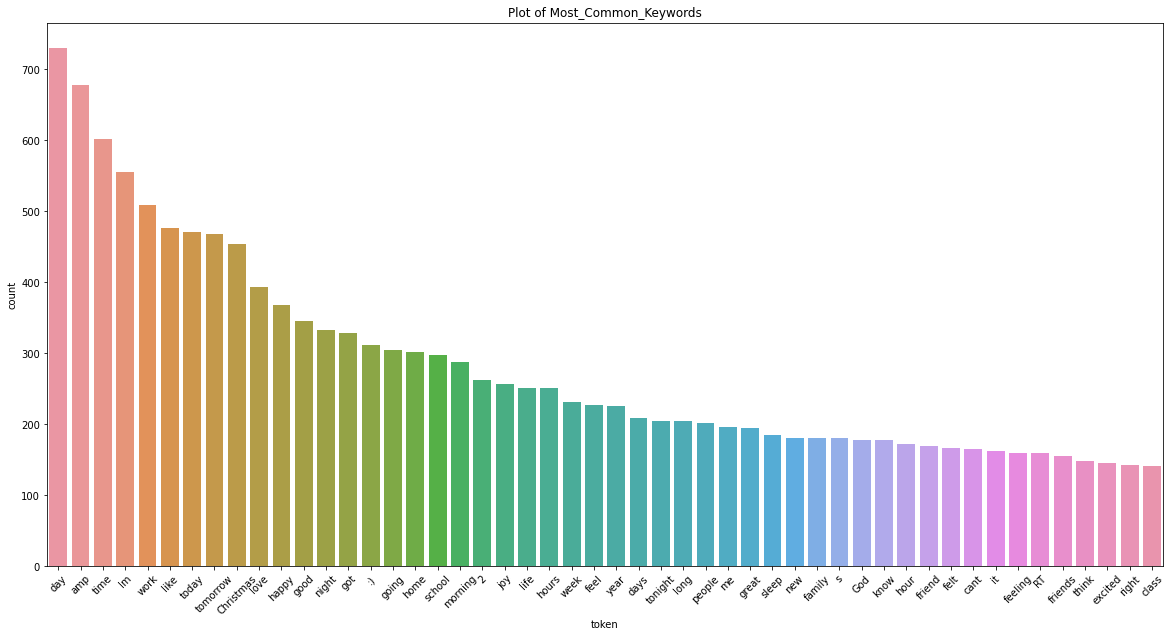

In [41]:
plot_most_common_words(keyword_joy,'joy')

In [42]:
surprise_list= df[df['Emotion']== 'surprise']['Clean_Text'].tolist()
surprise_docx= ' '.join(surprise_list)
keyword_surprise= extract_keywords(surprise_docx)

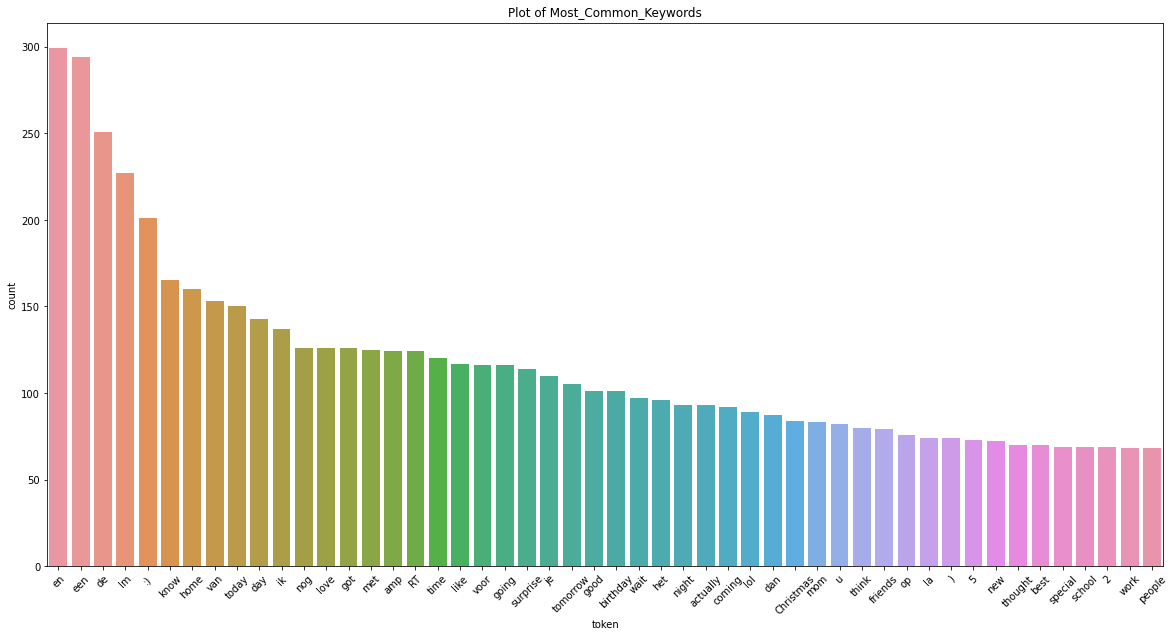

In [43]:
plot_most_common_words(keyword_surprise,'surprise')

In [44]:
neutral_list= df[df['Emotion']== 'neutral']['Clean_Text'].tolist()
neutral_docx= ' '.join(neutral_list)
keyword_neutral= extract_keywords(neutral_docx)

In [45]:
sadness_list= df[df['Emotion']== 'sadness']['Clean_Text'].tolist()
sadness_docx= ' '.join(sadness_list)
keyword_sadness= extract_keywords(sadness_docx)

In [46]:
fear_list= df[df['Emotion']== 'fear']['Clean_Text'].tolist()
fear_docx= ' '.join(fear_list)
keyword_fear= extract_keywords(fear_docx)

In [47]:
anger_list= df[df['Emotion']== 'anger']['Clean_Text'].tolist()
anger_docx= ' '.join(anger_list)
keyword_anger= extract_keywords(anger_docx)

In [48]:
shame_list= df[df['Emotion']== 'shame']['Clean_Text'].tolist()
shame_docx= ' '.join(shame_list)
keyword_shame= extract_keywords(shame_docx)

In [49]:
disgust_list= df[df['Emotion']== 'disgust']['Clean_Text'].tolist()
disgust_docx= ' '.join(disgust_list)
keyword_disgust= extract_keywords(disgust_docx)

In [50]:
from wordcloud import WordCloud

In [51]:
def plot_wordcloud(docx):
  mywordcloud= WordCloud().generate(docx)
  plt.figure(figsize=(20,10))
  plt.imshow(mywordcloud,interpolation='Bilinear')
  plt.axis('off')
  plt.show()

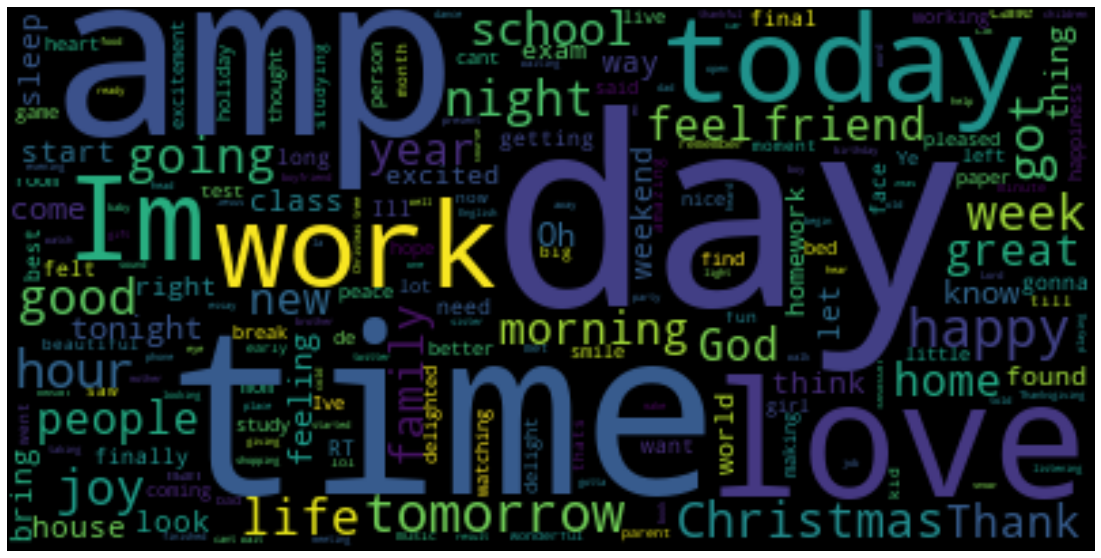

In [52]:
plot_wordcloud(joy_docx)

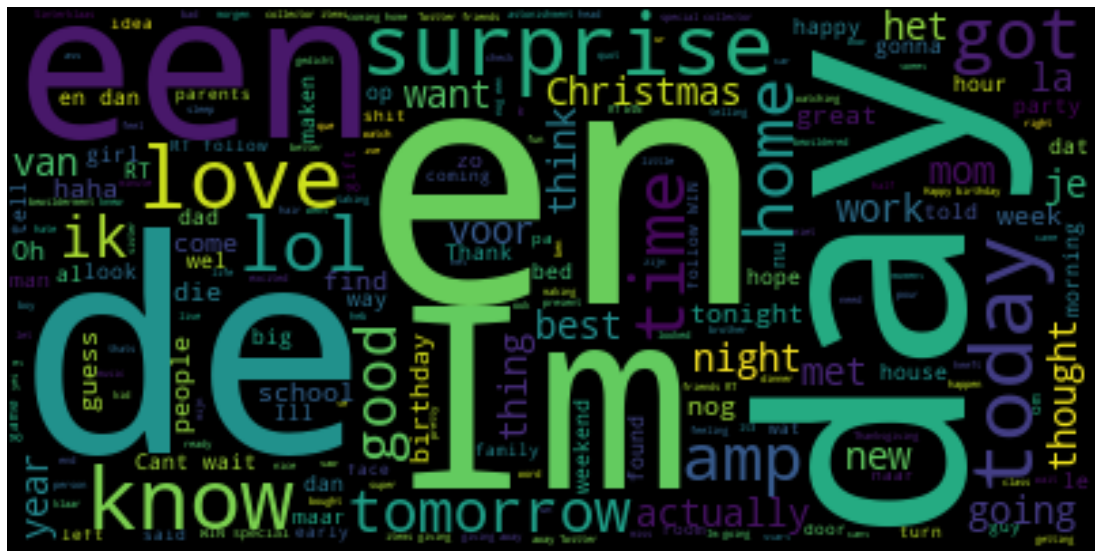

In [53]:
plot_wordcloud(surprise_docx)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
Xfeatures= df['Clean_Text']
ylabels= df['Emotion']

In [57]:
cv= CountVectorizer()

In [58]:
X= cv.fit_transform(Xfeatures)

In [59]:
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [60]:
X_train,X_test,y_train,y_test= train_test_split(X,ylabels,train_size=0.7,random_state=2529)

In [61]:
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [62]:
nv_model.score(X_test,y_test)

0.5678290860318068

In [63]:
y_pred_for_nv= nv_model.predict(X_test)

In [64]:
sample_text= ['I like working today']

In [65]:
vect= cv.transform(sample_text).toarray()

In [66]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [67]:
nv_model.predict_proba(vect)

array([[6.54784070e-03, 1.98932143e-04, 4.30572265e-02, 8.53074735e-01,
        7.97981469e-04, 7.91020270e-02, 3.53951991e-08, 1.72212215e-02]])

In [68]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [69]:
np.max(nv_model.predict_proba(vect))

0.8530747353427292

In [70]:
def predict_emotion(sample_text,model):
  myvect= cv.transform(sample_text).toarray()
  prediction= model.predict(myvect)
  pred_proba= model.predict_proba(myvect)
  pred_percentage_for_all= dict(zip(model.classes_,pred_proba[0]))
  print("Prediction:{}, Prediction_Score:{}".format(prediction[0],np.max(pred_proba)))
  return pred_percentage_for_all

In [71]:
predict_emotion(sample_text,nv_model)

Prediction:joy, Prediction_Score:0.8530747353427292


{'anger': 0.006547840695247373,
 'disgust': 0.00019893214293505818,
 'fear': 0.04305722647077832,
 'joy': 0.8530747353427292,
 'neutral': 0.0007979814687649988,
 'sadness': 0.07910202699563477,
 'shame': 3.539519908061336e-08,
 'surprise': 0.01722122148871186}

In [72]:
print(classification_report(y_test,y_pred_for_nv))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       anger       0.63      0.48      0.55      1269
     disgust       0.62      0.03      0.06       255
        fear       0.73      0.60      0.66      1677
         joy       0.52      0.87      0.65      3350
     neutral       0.43      0.03      0.06       692
     sadness       0.56      0.52      0.54      2000
       shame       0.00      0.00      0.00        51
    surprise       0.60      0.29      0.39      1144

    accuracy                           0.57     10438
   macro avg       0.51      0.35      0.36     10438
weighted avg       0.58      0.57      0.53     10438



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 615,    0,   73,  380,    3,  188,    0,   10],
       [  36,    8,   17,  107,    2,   69,    0,   16],
       [  74,    0, 1007,  351,    3,  170,    0,   72],
       [  71,    2,   95, 2907,   11,  189,    0,   75],
       [  24,    0,   26,  534,   23,   75,    0,   10],
       [  87,    2,   91,  735,    8, 1035,    0,   42],
       [  21,    0,    9,   10,    0,   11,    0,    0],
       [  44,    1,   54,  583,    4,  126,    0,  332]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


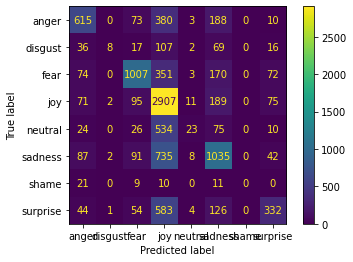

In [74]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [75]:
import joblib

In [76]:
model_file= open("emotion_classifier.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [77]:
lr_model= LogisticRegression()

In [78]:
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [79]:
lr_model.score(X_test,y_test)

0.6285686913201762

In [80]:
predict_emotion(sample_text,lr_model)

Prediction:joy, Prediction_Score:0.6099461176279781


{'anger': 0.02932726146177501,
 'disgust': 0.014795834280519126,
 'fear': 0.031330130304700804,
 'joy': 0.6099461176279781,
 'neutral': 0.09266262304907792,
 'sadness': 0.12513473951317458,
 'shame': 0.0006930037093611167,
 'surprise': 0.09611029005341334}

In [81]:
!pip install eli5



     |████████████████████████████████| 106 kB 30.6 MB/s 


In [82]:
import eli5

In [83]:
eli5.show_weights(lr_model,top=20)

In [84]:
class_names= ylabels.unique().tolist()

In [85]:
feature_names=cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [86]:
eli5.show_weights(lr_model, feature_names=feature_names,target_names=class_names)